# news recommendation

In [64]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample texts and keywords (replace these with your actual data)
texts = [
    "The cat sat on the mat.",
    "The dog barked at the postman.",
    "The cat and the dog played together.",
    "The quick brown fox jumps over the lazy dog.",
    "A mathematician sat on a mat."
]
# Initialize with a 3-star rating for each text
ratings = np.array([3.0] * len(texts))

# Initialize TfidfVectorizer (you can limit vocabulary to your keywords if needed)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Function to update ratings based on user feedback
def update_ratings(index, user_rating, alpha=0.5):
    global ratings
    # Compute similarity to all other texts
    similarity_scores = cosine_similarity(tfidf_matrix[index], tfidf_matrix).flatten()
    
    # Update each rating based on similarity and user rating
    for i in range(len(ratings)):
        if i != index:  # Don't update the text the user rated directly
            ratings[i] += alpha * (user_rating - ratings[i]) * similarity_scores[i]
    
    # Update the rated text directly
    ratings[index] = user_rating

# Example usage
print("Initial Ratings:", ratings)
update_ratings(index=0, user_rating=5)  # User rates the first text 5 stars
print("Updated Ratings:", ratings)
update_ratings(index=1, user_rating=1)  # User rates the second text 1 star
print("Final Ratings:", ratings)


Initial Ratings: [3. 3. 3. 3. 3.]
Updated Ratings: [5.         3.29699152 3.42114478 3.23220559 3.57742356]
Final Ratings: [4.40601695 1.         3.00789703 2.91443314 3.57742356]


In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#linked = linkage(tfidf_matrix.toarray(), method='ward')
#print(linked)

#plt.figure(figsize=(10, 7))
#dendrogram(linked, labels=range(0, len(articles)), leaf_rotation=90, leaf_font_size=12)
#plt.show()

---
---
---

# usar os nossos textos

In [66]:
import pandas as pd

df = pd.read_parquet('data05.parquet')
df["keywords"] = df["keywords"].map(lambda dic: {key: dic[key] for key in dic.keys() if dic[key] is not None and dic[key]["filter"] > 0.1})

In [67]:
df = df.iloc[0, :]
df

aliases                      [Banco Comercial Português, BCP]
news        [{'ExtractedText': 'DN   13 de Setembro de 200...
keywords    {'Angola': {'count': 135, 'date': {'200409': N...
Name: Banco Comercial Português, dtype: object

In [68]:
news = []
setences = []
for new in df["news"]:
    website_link = new["linkToArchive"].replace("/wayback/", "/noFrame/replay/")
    news.append(website_link)
    setence = ""
    for type in new["newsNER"].keys():
        try:
            setence += " ".join(set(new["newsNER"][type]))
        except:
            pass
    setences.append(setence)

In [69]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample texts and keywords (replace these with your actual data)
texts = setences
# Initialize with a 3-star rating for each text
ratings = np.array([3.0] * len(texts))

# Initialize TfidfVectorizer (you can limit vocabulary to your keywords if needed)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

# Function to update ratings based on user feedback
def update_ratings(index, user_rating):
    global ratings
    # Compute similarity to all other texts
    similarity_scores = cosine_similarity(tfidf_matrix[index], tfidf_matrix).flatten()
    
    # Update each rating based on similarity and user rating
    for i in range(len(ratings)):
        if i != index:  # Don't update the text the user rated directly
            ratings[i] += (user_rating - ratings[i]) * similarity_scores[i]
    
    # Update the rated text directly
    ratings[index] = user_rating

# Example usage
print("Initial Ratings:", ratings)
update_ratings(index=0, user_rating=5)  # User rates the first text 5 stars
print("Updated Ratings:", ratings)
update_ratings(index=1, user_rating=1)  # User rates the second text 1 star
print("Final Ratings:", ratings)


Initial Ratings: [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 

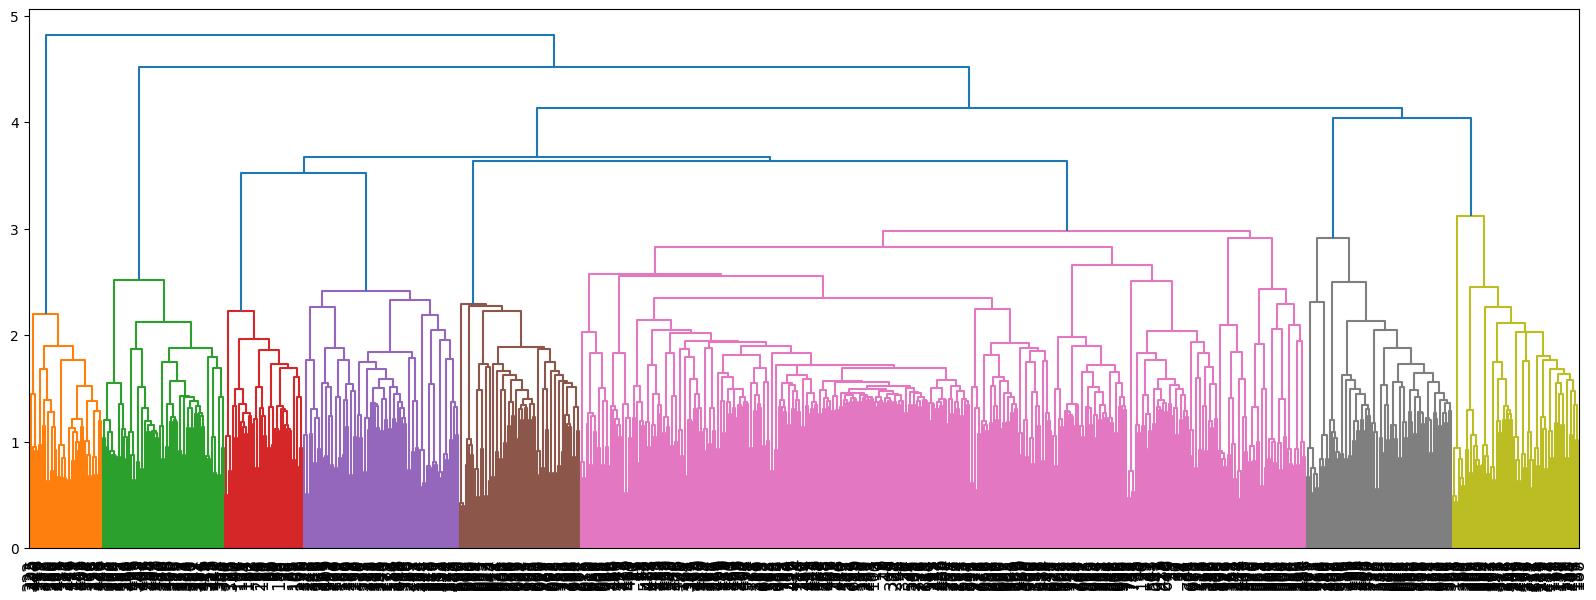

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(tfidf_matrix.toarray(), method='ward')
#print(linked)

plt.figure(figsize=(20, 7))
dendrogram(linked, labels=range(0, len(texts)), leaf_rotation=90, leaf_font_size=12)
plt.show()

---

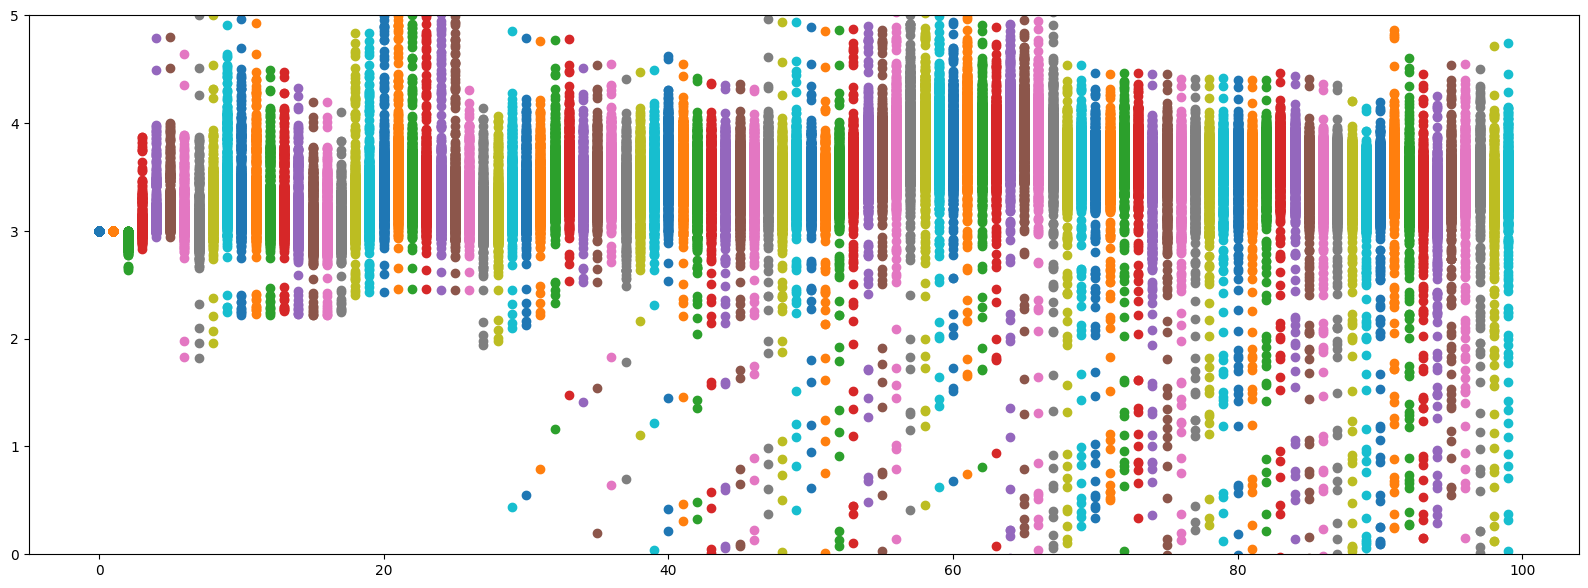

In [109]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts = setences
ratings = np.array([3.0] * len(texts))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(texts)

def update_ratings(index, user_rating):
    global ratings
    # Compute similarity to all other texts
    similarity_scores = cosine_similarity(tfidf_matrix[index], tfidf_matrix).flatten()
    
    ratings += (user_rating - ratings) * similarity_scores#np.exp(similarity_scores) * 0.15
    ratings[index] = -30
import random
plt.figure(figsize=(20, 7))
for _ in range(100):
    weights = np.exp(np.array(ratings))  # Exponential gives higher prob to larger values
    weights = weights / weights.sum()  # Normalize to prob
    
    # Select an index based on the weights
    index = np.random.choice(len(ratings), p=weights)
    #print(news[index])
    #rating = int(input(f"Rating of {index}: "))
    rating = random.randint(1, 6)
    update_ratings(index, rating)
    plt.scatter([_]*len(ratings), ratings)
plt.ylim(0,5)
plt.show()

In [90]:
ratings[3], ratings[5]

(np.float64(3.0), np.float64(3.0))